In [ ]:
This data set is derived from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). 
The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv",parse_dates=['Date'])
# to remove 29th Feb form the dataset

month=df['Date'].dt.month != 2
day=df['Date'].dt.day!=29
df=df[(month | day)]


In [3]:
df['dayofyear']=df['Date'].dt.strftime('%m/%d')
df.sort_values(by='dayofyear',ascending=True,inplace=True)

In [4]:
line=df[df['Date']<'2015-01-01'] # for line plots 
Scatter=df[df['Date']>='2015-01-01'] # for scatter plot

In [6]:
# groping data and extracting the needed 
scatter_series=Scatter.groupby(['dayofyear','Element']).agg({'Data_Value':[max,min]})
st_max=scatter_series.loc[(slice(None),'TMAX'),('Data_Value','max')]
st_min=scatter_series.loc[(slice(None),'TMIN'),('Data_Value','min')]

In [7]:
line_series=line.groupby(['dayofyear','Element']).agg({'Data_Value':[max,min]})
t_max=line_series.loc[(slice(None),'TMAX'),('Data_Value','max')]
t_min=line_series.loc[(slice(None),'TMIN'),('Data_Value','min')]

In [8]:
# to fetch data where 2015 over shoot previous records

oversoot_max=[]
oversoot_min=[]
for i in range(365):
    if t_max[i]<st_max[i]:
        oversoot_max.append([i+1,st_max[i]])
    if t_min[i]>st_min[i]:
        oversoot_min.append([i+1,st_min[i]])
    

In [9]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


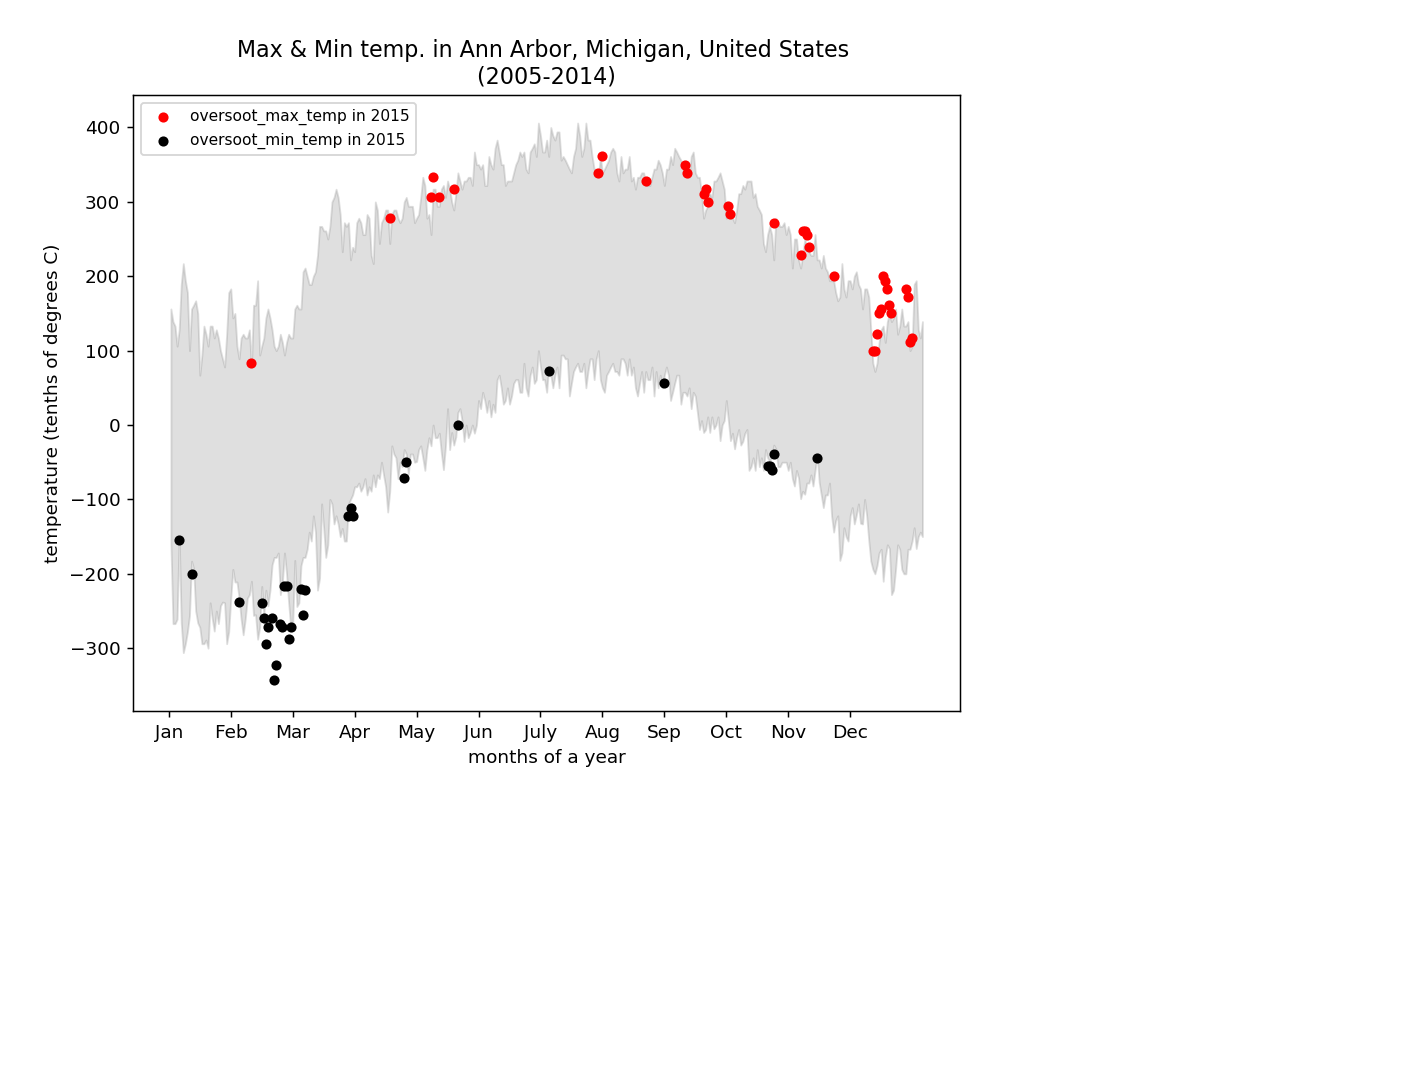

In [10]:
fig=plt.gcf()
fig.set_size_inches(8,6)

In [11]:
#plt.plot(range(1,366),t_max.values,label='max_temp(2005-2014)')
#plt.plot(range(1,366),t_min.values,label="min_temp(2005-2014)")


In [12]:
plt.xlabel('months of a year')
plt.ylabel('temperature (tenths of degrees C)')

Text(0, 0.5, 'temperature (tenths of degrees C)')

In [13]:
plt.fill_between(range(1,366),t_max.values,t_min.values,color='grey',alpha=0.25)

In [14]:
plt.scatter([x[0] for x in oversoot_max],[x[1] for x in oversoot_max],s=20,c='red',label='oversoot_max_temp in 2015')

In [15]:
plt.scatter([x[0] for x in oversoot_min],[x[1] for x in oversoot_min],s=20,c='black',label='oversoot_min_temp in 2015')

In [16]:
plt.legend(loc='upper left',fontsize='small')

In [19]:
plt.title('Max & Min temp. in Ann Arbor, Michigan, United States \n (2005-2014) ')

Text(0.5, 1.0, 'Max & Min temp. in Ann Arbor, Michigan, United States \n (2005-2014) ')

In [18]:
plt.xticks([i*30 for i in range(12)],['Jan','Feb','Mar','Apr','May',"Jun",'July',"Aug",'Sep','Oct','Nov','Dec'])

([<matplotlib.axis.XTick at 0x7ff8fdd67320>,
 <a list of 12 Text xticklabel objects>)

In [20]:
plt.savefig('assginment.png')